In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
products = pd.read_csv(r'C:\Users\Chethana\Downloads\Products.csv')
customers = pd.read_csv(r'C:\Users\Chethana\Downloads\Customers.csv')
transactions = pd.read_csv(r'C:\Users\Chethana\Downloads\Transactions.csv')

In [2]:
# Display the first rows of each dataset
products_info = products.head()
customers_info = customers.head()
transactions_info = transactions.head()


In [3]:
# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [4]:
# Aggregate transaction data by CustomerID
customer_summary = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'}).reset_index()
customer_summary

,CustomerID,TotalValue,Quantity
0,C0001,3354.52,12
1,C0002,1862.74,10
2,C0003,2725.38,14
3,C0004,5354.88,23
4,C0005,2034.24,7
...,...,...,...
194,C0196,4982.88,12
195,C0197,1928.65,9
196,C0198,931.83,3
197,C0199,1979.28,9


In [5]:
# Add customer profile features (e.g., region)
customer_profile = merged_data[['CustomerID', 'Region']].drop_duplicates()
customer_profile


,CustomerID,Region
0,C0199,Europe
1,C0146,Asia
2,C0127,Europe
3,C0087,South America
4,C0070,Europe
...,...,...
831,C0058,North America
850,C0095,South America
857,C0151,South America
876,C0078,Asia


In [6]:
customer_summary = customer_summary.merge(customer_profile, on='CustomerID')
customer_summary

,CustomerID,TotalValue,Quantity,Region
0,C0001,3354.52,12,South America
1,C0002,1862.74,10,Asia
2,C0003,2725.38,14,South America
3,C0004,5354.88,23,South America
4,C0005,2034.24,7,Asia
...,...,...,...,...
194,C0196,4982.88,12,Europe
195,C0197,1928.65,9,Europe
196,C0198,931.83,3,Europe
197,C0199,1979.28,9,Europe


In [7]:
# One-hot encode the Region feature
customer_summary = pd.get_dummies(customer_summary, columns=['Region'], drop_first=True)
customer_summary

,CustomerID,TotalValue,Quantity,Region_Europe,Region_North America,Region_South America
0,C0001,3354.52,12,False,False,True
1,C0002,1862.74,10,False,False,False
2,C0003,2725.38,14,False,False,True
3,C0004,5354.88,23,False,False,True
4,C0005,2034.24,7,False,False,False
...,...,...,...,...,...,...
194,C0196,4982.88,12,True,False,False
195,C0197,1928.65,9,True,False,False
196,C0198,931.83,3,True,False,False
197,C0199,1979.28,9,True,False,False


In [13]:

from sklearn.preprocessing import StandardScaler
features = customer_summary.drop('CustomerID', axis=1)

# Separate numeric and non-numeric columns
numeric_features = features.select_dtypes(include=['number'])
categorical_features = features.select_dtypes(exclude=['number'])


if not categorical_features.empty:
    categorical_features = pd.get_dummies(categorical_features)

# Combine numeric and encoded categorical features
processed_features = pd.concat([numeric_features, categorical_features], axis=1)

# Scale numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(processed_features)

# Convert scaled features back to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=processed_features.columns)
print(scaled_features_df.head())


   TotalValue  Quantity   Cluster  Region_Europe  Region_North America  \
0   -0.061701 -0.122033 -1.291116      -0.579284             -0.548319   
1   -0.877744 -0.448000 -0.483153      -0.579284             -0.548319   
2   -0.405857  0.203934 -1.291116      -0.579284             -0.548319   
3    1.032547  1.670787  1.132771      -0.579284             -0.548319   
4   -0.783929 -0.936951 -0.483153      -0.579284             -0.548319   

   Region_South America  
0              1.540416  
1             -0.649175  
2              1.540416  
3              1.540416  
4             -0.649175  


In [14]:
# Clustering with KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Range of cluster numbers to evaluate
range_n_clusters = range(2, 11)
db_index_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    
    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(scaled_features, labels)
    db_index_values.append(db_index)


print("Davies-Bouldin Index values:", db_index_values)


Davies-Bouldin Index values: [1.5980307580943682, 1.2501116328618649, 1.09778846527438, 0.9232435204729684, 0.9305201818431502, 0.713678413301005, 0.6966736832164475, 0.5448187186898139, 0.5307516554836362]


In [15]:
#  Identify the best number of clusters based on DB Index
import numpy as np
best_n_clusters = range_n_clusters[np.argmin(db_index_values)]
print(f"Optimal number of clusters: {best_n_clusters}")
print(f"Davies-Bouldin Index for optimal clusters: {min(db_index_values)}")


Optimal number of clusters: 10
Davies-Bouldin Index for optimal clusters: 0.5307516554836362


In [16]:
#  Fit KMeans with optimal clusters
kmeans_final = KMeans(n_clusters=best_n_clusters, random_state=42)
final_labels = kmeans_final.fit_predict(scaled_features)

# Add cluster labels to the summary DataFrame
customer_summary['Cluster'] = final_labels

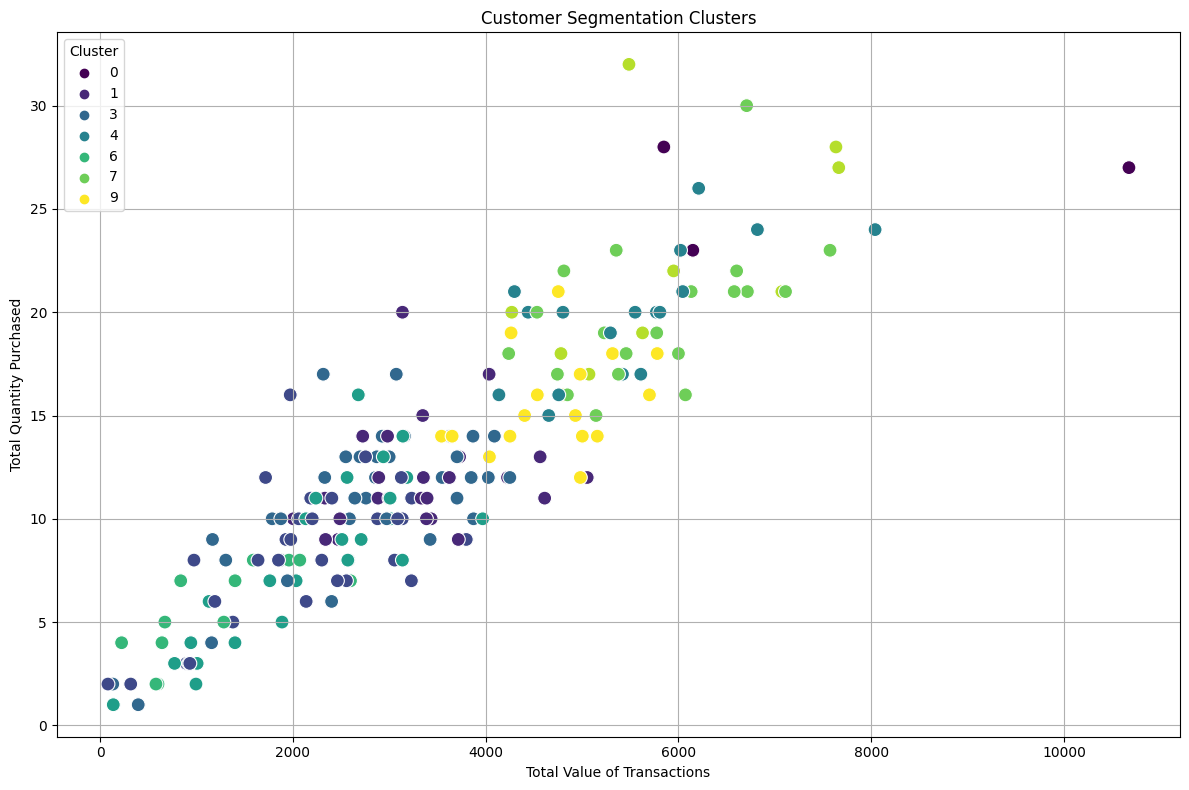

In [17]:
#  Visualize Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=customer_summary['TotalValue'], y=customer_summary['Quantity'], hue=customer_summary['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Value of Transactions')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()
